In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.losses import SparseCategoricalCrossentropy

In [41]:
X = pd.read_csv("./digit-recognizer/train.csv", sep=",")
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")

sample_submission = pd.read_csv("./digit-recognizer/sample_submission.csv", sep=",")

In [42]:
X.head(5)
# (42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Y.head(5)
# (28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='label', ylabel='count'>

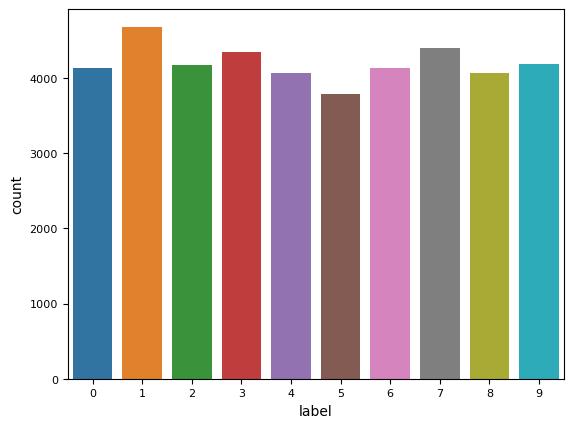

In [44]:
sns.countplot(x = 'label', data = X)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, X['label'], test_size=0.2, shuffle = True, stratify =X['label'],  random_state=42)

Y_train = LabelBinarizer().fit_transform(Y_train)
Y_test  = LabelBinarizer().fit_transform(Y_test)

X_train = X_train.drop(columns=['label'])
X_test  = X_test.drop(columns=['label'])

X_train = X_train / 255.0
X_test  = X_test / 255.0

X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
Y = Y.values.reshape(-1,28,28,1)

print("Train X dataset shape: ", np.shape(X_train))
print("Train y dataset shape: ", np.shape(Y_train))

print("Test X dataset shape: ", np.shape(X_test))
print("Test y dataset shape: ", np.shape(Y_test))

Train X dataset shape:  (33600, 28, 28, 1)
Train y dataset shape:  (33600, 10)
Test X dataset shape:  (8400, 28, 28, 1)
Test y dataset shape:  (8400, 10)


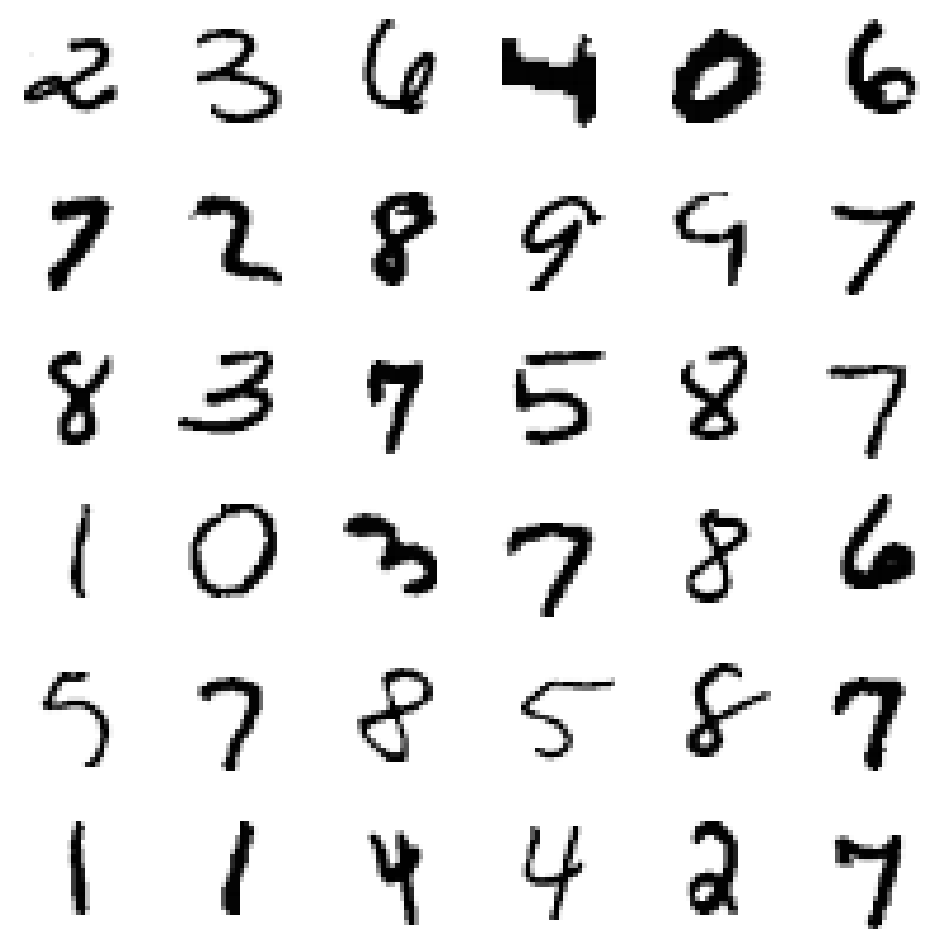

In [46]:
plt.rc('font', size=10)
plt.rc('legend', fontsize= 10)
plt.rc('xtick', labelsize= 8)
plt.rc('ytick', labelsize= 8)

fig, ax = plt.subplots(6, 6, figsize = (12, 12))

img_idx = 0
for i in range(6):
    for j in range(6):
        ax[i][j].imshow(X_train[img_idx], cmap = 'Greys')
        ax[i][j].axis('off')
        img_idx += 1
        
plt.show()

In [47]:
# Define Sequential model with 2 layers
   
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(550, activation='relu'))
model.add(layers.Dense(260, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#callback=EarlyStopping(monitor='val_accuracy')

model.summary()

#loss=SparseCategoricalCrossentropy(from_logits=True)
#optim=keras.optimizers.Adam(learning_rate=0.1)

model.compile(loss='CategoricalCrossentropy', metrics=['accuracy'], optimizer = Adam())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 800)               0         
                                                                 
 dense_23 (Dense)            (None, 550)              

In [48]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
1050/1050 [==============================] - 14s 13ms/step - loss: 0.1968 - accuracy: 0.9390 - val_loss: 0.0737 - val_accuracy: 0.9763
Epoch 2/100
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0542 - val_accuracy: 0.9842
Epoch 3/100
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 4/100
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0718 - val_accuracy: 0.9810
Epoch 5/100
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0525 - val_accuracy: 0.9856
Epoch 6/100
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0483 - val_accuracy: 0.9882
Epoch 7/100
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0

In [49]:
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")
Y = Y.values.reshape(-1,28,28,1)

pred = model.predict(Y)

875/875 [==============================] - 3s 3ms/step


In [50]:
df = pd.DataFrame(columns=["ImageId","Label"])

df.Label   = [_.argmax() for _ in pred]
df.ImageId = df.index+1
df.to_csv("./digit-recognizer/submission.csv", index = False)

df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [51]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


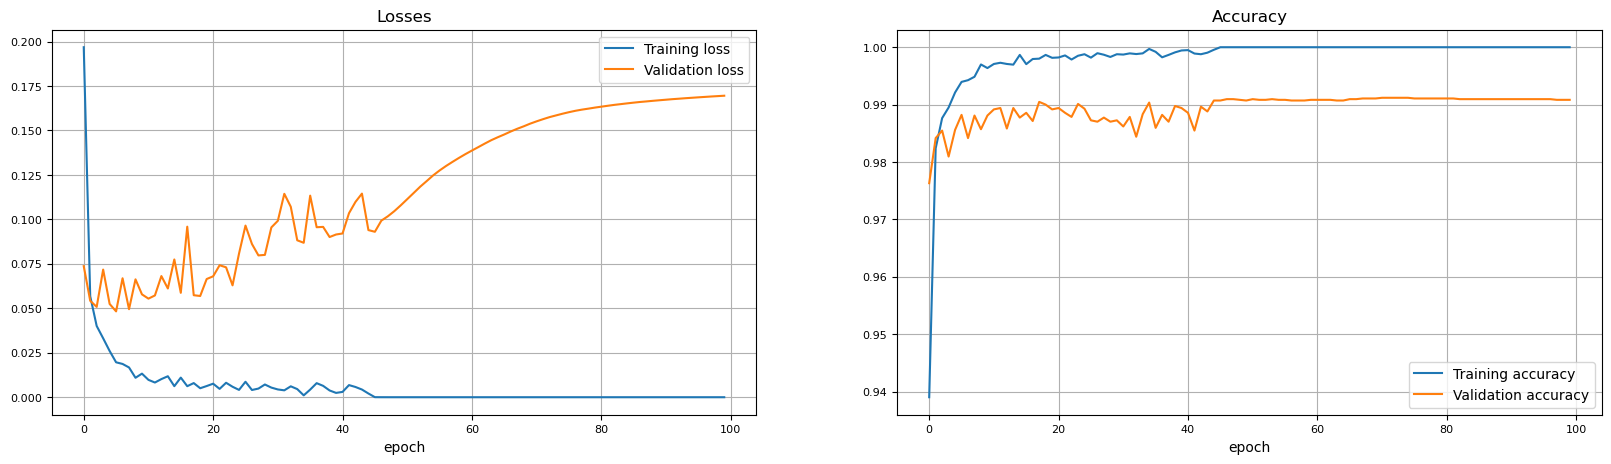

In [52]:
plot_losses(history.history)